# Explore here

In [2]:
import os
import numpy as np
#import matplotlib.pyplot as plt
def dummy_npwarn_decorator_factory():
  def npwarn_decorator(x):
    return x
  return npwarn_decorator
np._no_nep50_warning = getattr(np, '_no_nep50_warning', dummy_npwarn_decorator_factory)
import torch as to
import torch.nn as nn
import pandas as pd
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image


### I used Pytorch instead of tensorflow for the exercise. I also trimmed the model and reduce the number of training examples in order to reduce computational cost. In the end I ended up running the training in my local machine to take advantage of my GPU. The training data consists of 25k images of cats and dogs. The first half being cats and the second half being dogs, that is how the data was labeled. The testing data on the other hand was not labeled and therefore was was unable to get an accuracy curve. One way to cicumvent this would be to use the unused portion of the training data (since its labeled) as testing data. ##

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [ ]:

model = nn.Sequential(
    
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  

    
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  

    
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  

    
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),  

    
    nn.Flatten(),

    
    nn.Linear(in_features=256 * 14 * 14, out_features=128),  # Reduced from 512x7x7
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 2) 
)


device = to.device("mps" if to.backends.mps.is_available() else "cpu")

print(f"Using device: {device}") 
model.to(device)




Using device: mps


Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=50176, out_features=128, bias=True)
  (14): ReLU()
  (15): Linear(in_features=128, out_features=64, bias=True)
  (16): ReLU()
  (17): Linear(in_features=64, out_features=2, bias=True)
)

In [ ]:



transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) 
])


class CatsDogsSubsetDataset(Dataset):
    def __init__(self, folder_path, transform=None, subset_size=5000):
        self.folder_path = folder_path
        self.transform = transform
        self.image_files = sorted(
            [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
        )

     
        self.image_files = self.image_files[:2500] + self.image_files[12500:15000]  # 2500 Cats + 2500 Dogs

      
        self.labels = [0] * 2500 + [1] * 2500  

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.folder_path, img_name)
        image = Image.open(img_path).convert("RGB")

        label = self.labels[idx]  

        if self.transform:
            image = self.transform(image)

        return image, label


train_path = "/Users/abrahamcampos/Desktop/dogs-vs-cats/train"


train_dataset = CatsDogsSubsetDataset(train_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)


print(f"Total images loaded for training: {len(train_dataset)}")  



Total images loaded for training: 5000


In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

       
        outputs = model(images)
        loss = criterion(outputs, labels)

       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

print("Training Complete!")


Epoch 1/10, Loss: 0.6609140380312459
Epoch 2/10, Loss: 0.5660352339378942
Epoch 3/10, Loss: 0.5144252894214167
Epoch 4/10, Loss: 0.47069423967085705
Epoch 5/10, Loss: 0.4323519235982682
Epoch 6/10, Loss: 0.4068958062333421
Epoch 7/10, Loss: 0.36609383622487895
Epoch 8/10, Loss: 0.3292704386928211
Epoch 9/10, Loss: 0.27818210314685543
Epoch 10/10, Loss: 0.24295390893023805
Training Complete!


In [8]:

class CatsDogsTestDataset(Dataset):
    def __init__(self, folder_path, transform=None):
        self.folder_path = folder_path
        self.transform = transform
        self.image_files = sorted(
            [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
        )

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.folder_path, img_name)
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, img_name  # No labels, just return image and filename


test_path = "/Users/abrahamcampos/Desktop/dogs-vs-cats/test1"


test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_dataset = CatsDogsTestDataset(test_path, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


print(f"Total test images: {len(test_dataset)}")


Total test images: 12500


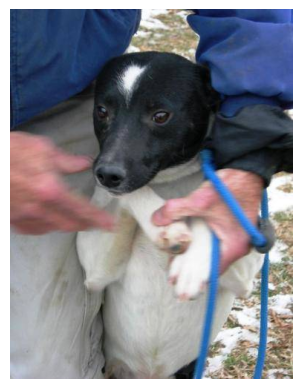

Predicted Class: Dog


In [ ]:
import matplotlib.pyplot as plt


def predict_image(model, image_path):
    model.eval()  
    
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
    
   
    image = Image.open(image_path).convert("RGB")
    plt.imshow(image)  
    plt.axis('off')
    plt.show()

    image = transform(image).unsqueeze(0).to(device)  

    
    with to.no_grad():
        output = model(image)
    
    pred = to.argmax(output).item() 
    return "Dog" if pred == 1 else "Cat"

# Example Prediction on a Single Image
sample_image_path = "/Users/abrahamcampos/Desktop/dogs-vs-cats/test1/1.jpg"  
print(f"Predicted Class: {predict_image(model, sample_image_path)}")


In [13]:

model.eval()  
predictions = {}

with to.no_grad():
    for images, filenames in test_loader:
        images = images.to(device)
        outputs = model(images)
        preds = to.argmax(outputs, dim=1)  # Get class predictions

        
        for i in range(len(filenames)):
            predictions[filenames[i]] = "Dog" if preds[i].item() == 1 else "Cat"


for filename, pred in list(predictions.items())[:10]:
    print(f"{filename}: {pred}")


1.jpg: Dog
10.jpg: Cat
100.jpg: Cat
1000.jpg: Dog
10000.jpg: Dog
10001.jpg: Dog
10002.jpg: Cat
10003.jpg: Dog
10004.jpg: Dog
10005.jpg: Cat
